In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from sklearn.metrics import f1_score
from sklearn.ensemble import ExtraTreesClassifier

from data import *
from helpers import *


In [4]:
# Automated way to create labeled dataset
#directory='/../data_gated/'
#columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
#create_labeled_dataset(directory,columns)

In [5]:
directory='/../data_gated/'
fileName='all_event/GL55_DN_3A.fcs'
data = load_file(fileName, directory)

In [6]:
data_df = pd.DataFrame(data=data, columns=data.channels)

In [7]:
data_df.shape

(88876, 12)

In [8]:
data_df.describe()

,FSC-H,SSC-H,B530-H,B572-H,B675-H,FSC-A,SSC-A,B530-A,B572-A,B675-A,Width,Time
count,8.887600e+04,8.887600e+04,88876.000000,88876.000000,88876.000000,88876.000000,8.887600e+04,8.887600e+04,88876.000000,8.887600e+04,88876.000000,88876.0
mean,1.699593e+04,1.012967e+05,5744.031738,4737.461914,7572.946289,4412.064453,2.628553e+04,6.444467e+03,5355.824707,8.479503e+03,20.599854,57562016.0
std,2.695854e+04,1.389337e+05,6409.855957,4288.270020,6790.579102,7962.434082,4.493701e+04,8.550692e+03,5973.897461,9.549083e+03,4.880441,34370124.0
min,5.050000e+02,0.000000e+00,3001.000000,380.000000,-744.000000,-771.000000,-3.770000e+03,1.905000e+03,-90.000000,-1.696000e+03,12.125000,6458.0
25%,6.536750e+03,3.361975e+04,3540.000000,2994.000000,4864.000000,1556.000000,8.188000e+03,3.531000e+03,3012.000000,4.807000e+03,17.000000,27722951.5
50%,1.078200e+04,6.746300e+04,4388.000000,3745.500000,6085.000000,2667.000000,1.692200e+04,4.674000e+03,4012.000000,6.421000e+03,19.625000,56499474.0
75%,1.869200e+04,1.252658e+05,6111.250000,5222.000000,8381.000000,4823.000000,3.214225e+04,6.947000e+03,5980.000000,9.503000e+03,23.125000,86601566.0
max,1.503840e+06,1.663512e+07,811606.000000,526333.000000,890752.000000,485485.000000,7.814016e+06,1.029000e+06,726998.000000,1.235096e+06,83.125000,119976960.0


In [7]:
# Summary of index, datatypes and non-null values of each column 
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88876 entries, 0 to 88875
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FSC-H   88876 non-null  float32
 1   SSC-H   88876 non-null  float32
 2   B530-H  88876 non-null  float32
 3   B572-H  88876 non-null  float32
 4   B675-H  88876 non-null  float32
 5   FSC-A   88876 non-null  float32
 6   SSC-A   88876 non-null  float32
 7   B530-A  88876 non-null  float32
 8   B572-A  88876 non-null  float32
 9   B675-A  88876 non-null  float32
 10  Width   88876 non-null  float32
 11  Time    88876 non-null  float32
dtypes: float32(12)
memory usage: 4.1 MB


In [8]:
# Number of unique values in each column
print(data_df.nunique())

FSC-H     33091
SSC-H     71585
B530-H    11901
B572-H    11350
B675-H    15703
FSC-A     14855
SSC-A     45694
B530-A    14584
B572-A    13492
B675-A    18398
Width       365
Time      88809
dtype: int64


## Feature selection



In [9]:
#Files
file = '../labeled_dataset.backup/GL55_DN_3A.csv'
df_labeled = pd.read_csv(file)
X,y = split_input_output(df_labeled,target_feature='label')

## Feature importance
Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.02973043 0.01356259 0.23546155 0.07349568 0.14050685 0.03034249
 0.01176765 0.21957185 0.06918411 0.12691275 0.04946405]


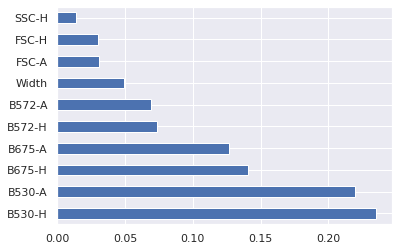

In [12]:

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

### Univariate Selection 
Compute the ANOVA F-value for the provided sample.

In [13]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

     Specs        Score
2   B530-H  8682.476218
7   B530-A  7459.320944
10   Width  4404.726152
1    SSC-H   165.928930
4   B675-H   144.038094
8   B572-A   136.094866
6    SSC-A    97.163917
3   B572-H    89.039421
0    FSC-H    86.594440
5    FSC-A    59.304281


# Remove Markdown to execute ---> Useless after having done the log transformation
# Create a new figure with a width of 12 and a height of 6
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df['FSC-H'])
g1.set_title("FSC-H DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df['SSC-H'],color='green')
g2.set_title('SSC-H DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df['B530-H'], color='r')
g3.set_title("B530-H DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df['B572-H'], color='k')
g4.set_title("B572-H  DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df['B675-H'])
g1.set_title("B675-H DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df['FSC-A'],color='green')
g2.set_title('FSC-A DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df['SSC-A'], color='r')
g3.set_title("SSC-A DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df['B530-A'], color='k')
g4.set_title("B530-A  DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df['B572-A'])
g1.set_title("B572-A DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df['B675-A'],color='green')
g2.set_title('B675-A DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df['Width'], color='r')
g3.set_title("Width DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df['Time'], color='k')
g4.set_title("Time  DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [12]:
#Log transformation
data_df_plot = data_df.copy()
data_df_plot['FSC-H'] = np.log(data_df['FSC-H'] + 1)
data_df_plot['SSC-H'] = np.log(data_df['SSC-H'] + 1)
data_df_plot['B530-H'] = np.log(data_df['B530-H'] + 1)
data_df_plot['B572-H'] = np.log(data_df['B572-H'] + 1)
data_df_plot['B675-H'] = np.log(data_df['B675-H'] + 1)
data_df_plot['FSC-A'] = np.log(data_df['FSC-A'] + 1)
data_df_plot['SSC-A'] = np.log(data_df['SSC-A'] + 1)
data_df_plot['B530-A'] = np.log(data_df['B530-A'] + 1)
data_df_plot['B572-A'] = np.log(data_df['B572-A'] + 1)
data_df_plot['B675-A'] = np.log(data_df['B675-A'] + 1)
data_df_plot['Width'] = np.log(data_df['Width'] + 1)
data_df_plot['Time'] = np.log(data_df['Time'] + 1)


/home/mika/.local/lib/python3.9/site-packages/pandas/core/arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


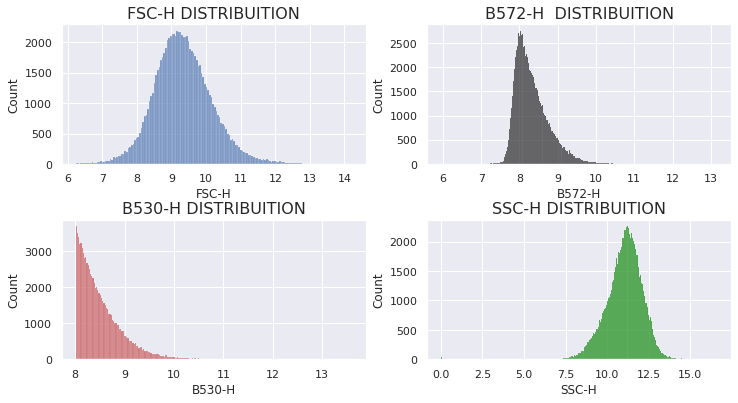

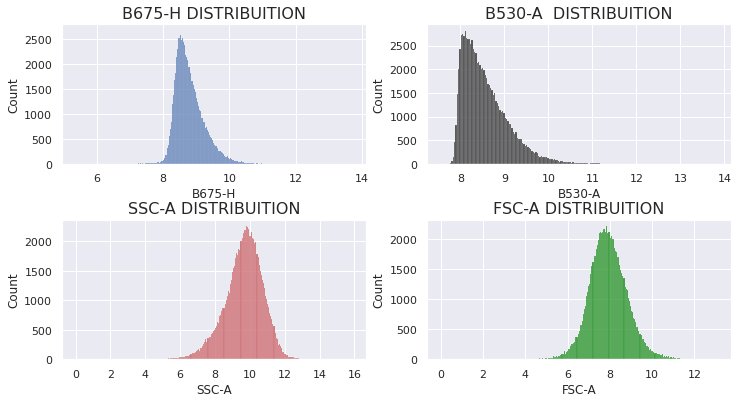

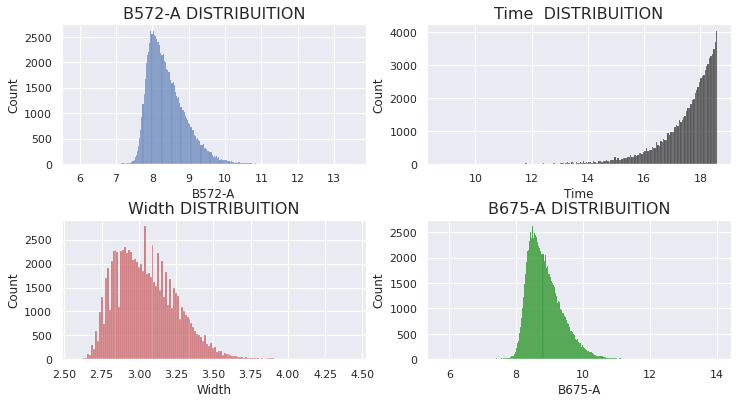

In [13]:
# Create a new figure with a width of 12 and a height of 6
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df_plot['FSC-H'])
g1.set_title("FSC-H DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df_plot['SSC-H'],color='green')
g2.set_title('SSC-H DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df_plot['B530-H'], color='r')
g3.set_title("B530-H DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df_plot['B572-H'], color='k')
g4.set_title("B572-H  DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df_plot['B675-H'])
g1.set_title("B675-H DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df_plot['FSC-A'],color='green')
g2.set_title('FSC-A DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df_plot['SSC-A'], color='r')
g3.set_title("SSC-A DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df_plot['B530-A'], color='k')
g4.set_title("B530-A  DISTRIBUITION", fontsize=16)


plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()
plt.figure(figsize = (12,6))

# Create four subplots (a 2x2 matrix of plots) with distribution plots
plt.subplot(221)
g1 = sns.histplot(data_df_plot['B572-A'])
g1.set_title("B572-A DISTRIBUITION", fontsize=16)

plt.subplot(224)
g2 = sns.histplot(data_df_plot['B675-A'],color='green')
g2.set_title('B675-A DISTRIBUITION', fontsize=16)

plt.subplot(223)
g3 = sns.histplot(data_df_plot['Width'], color='r')
g3.set_title("Width DISTRIBUITION", fontsize=16)

plt.subplot(222)
g4 = sns.histplot(data_df_plot['Time'], color='k')
g4.set_title("Time  DISTRIBUITION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

Analyse

In [14]:
corr_df = data_df[data_df.columns]
cor = corr_df.corr(method='pearson')
print(cor)

           FSC-H     SSC-H    B530-H    B572-H    B675-H     FSC-A     SSC-A  \
FSC-H   1.000000  0.438572  0.398218  0.520843  0.509435  0.983727  0.438048   
SSC-H   0.438572  1.000000  0.182955  0.253193  0.250781  0.462046  0.964463   
B530-H  0.398218  0.182955  1.000000  0.814982  0.714618  0.422982  0.190874   
B572-H  0.520843  0.253193  0.814982  1.000000  0.976429  0.550156  0.259016   
B675-H  0.509435  0.250781  0.714618  0.976429  1.000000  0.539367  0.256186   
FSC-A   0.983727  0.462046  0.422982  0.550156  0.539367  1.000000  0.485277   
SSC-A   0.438048  0.964463  0.190874  0.259016  0.256186  0.485277  1.000000   
B530-A  0.411452  0.203076  0.991721  0.829598  0.734618  0.450607  0.221916   
B572-A  0.516008  0.267198  0.805773  0.988194  0.966096  0.563316  0.287271   
B675-A  0.505016  0.263858  0.715176  0.967036  0.988085  0.552667  0.283428   
Width   0.393564  0.263099  0.584604  0.632236  0.599060  0.415186  0.273784   
Time   -0.002103 -0.006680 -0.003276 -0.

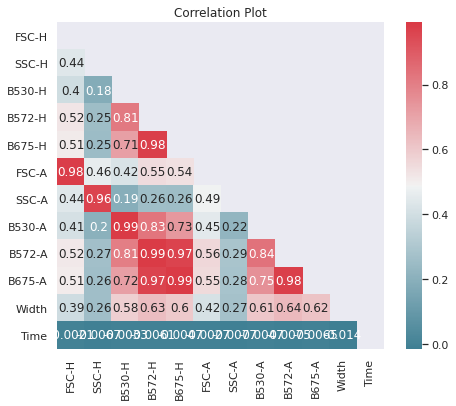

In [15]:
mask = np.triu(np.ones_like(cor, dtype=bool))

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
hmap = sns.heatmap(cor, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)
plt.show()

           FSC-H     SSC-H    B530-H    B572-H    B675-H     FSC-A     SSC-A  \
FSC-H   1.000000  0.438572  0.398218  0.520843  0.509435  0.983727  0.438048   
SSC-H   0.438572  1.000000  0.182955  0.253193  0.250781  0.462046  0.964463   
B530-H  0.398218  0.182955  1.000000  0.814982  0.714618  0.422982  0.190874   
B572-H  0.520843  0.253193  0.814982  1.000000  0.976429  0.550156  0.259016   
B675-H  0.509435  0.250781  0.714618  0.976429  1.000000  0.539367  0.256186   
FSC-A   0.983727  0.462046  0.422982  0.550156  0.539367  1.000000  0.485277   
SSC-A   0.438048  0.964463  0.190874  0.259016  0.256186  0.485277  1.000000   
B530-A  0.411452  0.203076  0.991721  0.829598  0.734618  0.450607  0.221916   
B572-A  0.516008  0.267198  0.805773  0.988194  0.966096  0.563316  0.287271   
B675-A  0.505016  0.263858  0.715176  0.967036  0.988085  0.552667  0.283428   
Width   0.393564  0.263099  0.584604  0.632236  0.599060  0.415186  0.273784   
Time   -0.002103 -0.006680 -0.003276 -0.

<AxesSubplot:title={'center':'Correlation Heat Map'}>

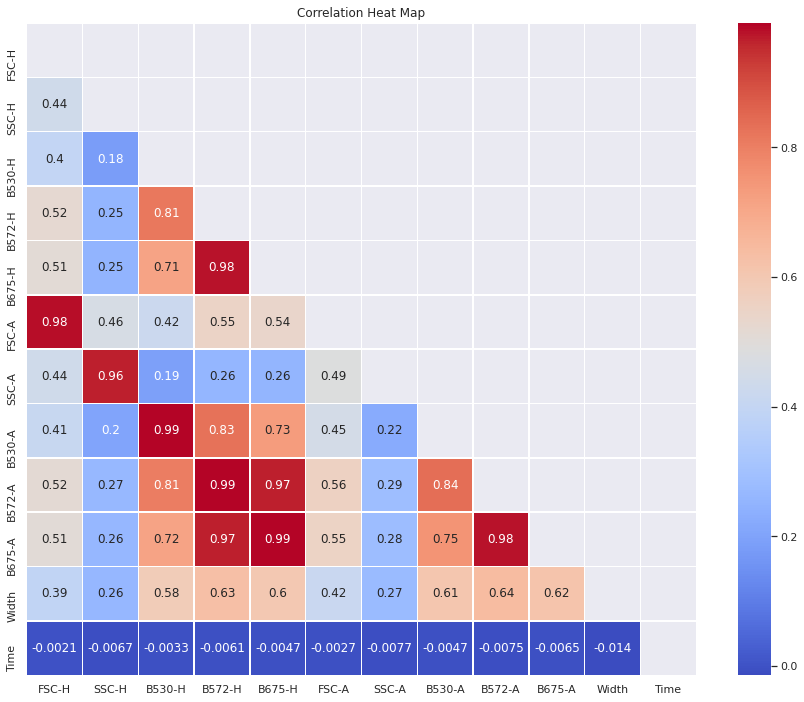

In [18]:
corr_df = data_df[data_df.columns]
cor = corr_df.corr(method='pearson')
print(cor)

df_visualize = data_df.copy()
fig, ax = plt.subplots(figsize=(15,12)) # create sublots
plt.title("Correlation Heat Map") # set the fig title
mask = np.triu(df_visualize.corr()) # create upper triangle of an array

sns.heatmap(df_visualize.corr(), annot = True, ax=ax, mask=mask, cmap= 'coolwarm', linewidths=.5) # visualize

This plot allows us to see whether some features are strongly correlated among them. For instance, B572-A and B675-A are strongly correlated (0.98), as well as B675-H and B675-A (0.99). These pairs therefore seem to contain redudant information and it would not make sense to select them together

## Features we selected last semester

In [17]:
#file = '../labeled_dataset/GL55_DN_3A.csv'
columns=['FSC-H', 'SSC-H', 'B530-H', 'B572-H', 'B675-H']
#X,y = preprocess(file,columns)

In [18]:
corr_df = data_df[columns]
cor = corr_df.corr(method='pearson')
print(cor)

           FSC-H     SSC-H    B530-H    B572-H    B675-H
FSC-H   1.000000  0.438572  0.398218  0.520843  0.509435
SSC-H   0.438572  1.000000  0.182955  0.253193  0.250781
B530-H  0.398218  0.182955  1.000000  0.814982  0.714618
B572-H  0.520843  0.253193  0.814982  1.000000  0.976429
B675-H  0.509435  0.250781  0.714618  0.976429  1.000000


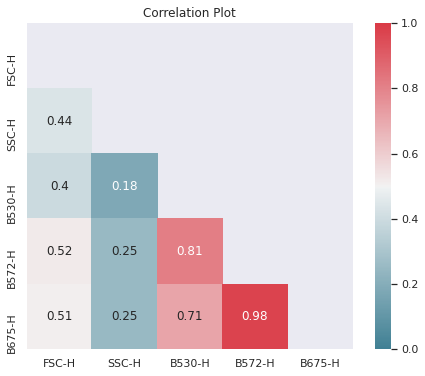

In [19]:
mask = np.triu(np.ones_like(cor, dtype=bool))

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
hmap = sns.heatmap(cor, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax,vmin=0,vmax=1)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)
plt.show()

## Features freshly selected

In [46]:
columns=['B530-H','B675-H','Width']

In [47]:
corr_df = data_df[columns]
cor = corr_df.corr(method='pearson')
print(cor)

          B530-H    B675-H     Width
B530-H  1.000000  0.714618  0.584604
B675-H  0.714618  1.000000  0.599060
Width   0.584604  0.599060  1.000000


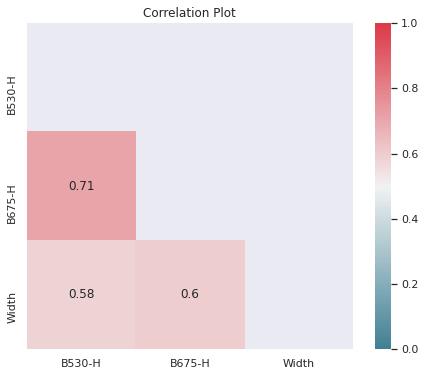

In [48]:
mask = np.triu(np.ones_like(cor, dtype=bool))

fig, ax =plt.subplots(figsize=(8, 6))
plt.title("Correlation Plot")
hmap = sns.heatmap(cor, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True,annot=True, ax=ax,vmin=0,vmax=1)
hmap.figure.savefig("Correlation_Heatmap_Lower_Triangle_with_Seaborn.png",
                    format='png',
                    dpi=150)
plt.show()

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

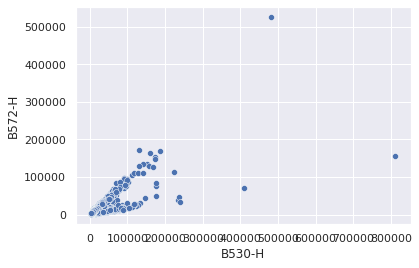

In [49]:
sns.scatterplot(data=data_df, x="B530-H", y="B572-H")

In [21]:
data_df.shape

(88876, 12)

We can see we have outliers

In [23]:
data_df_no_outliers = remove_outliers(data_df)

In [24]:
data_df_no_outliers.shape

(85640, 12)

<AxesSubplot:xlabel='B530-H', ylabel='B572-H'>

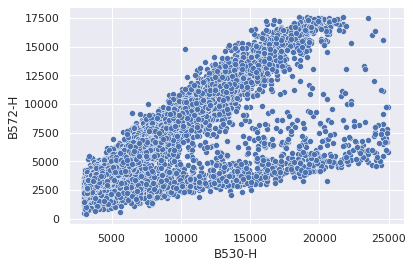

In [25]:
sns.scatterplot(data=data_df_no_outliers, x="B530-H", y="B572-H")

In [26]:
data_df_no_outliers.describe()

,FSC-H,SSC-H,B530-H,B572-H,B675-H,FSC-A,SSC-A,B530-A,B572-A,B675-A,Width,Time
count,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.0
mean,14380.914062,90919.835938,5232.871094,4400.712402,7085.372559,3656.668213,23212.978516,5741.617188,4874.991699,7768.408691,20.176914,57604068.0
std,12588.239258,83562.367188,2635.897217,2182.033447,3466.458496,3378.410400,22135.816406,3434.029053,2864.013916,4571.585449,4.110979,34352860.0
min,505.000000,0.000000,3001.000000,380.000000,-744.000000,-771.000000,-3770.000000,1905.000000,-90.000000,-1696.000000,12.125000,6458.0
25%,6434.000000,32936.500000,3520.000000,2975.000000,4837.000000,1526.000000,7997.750000,3504.000000,2987.000000,4766.000000,16.875000,27759610.5
50%,10488.000000,65604.500000,4329.000000,3694.000000,6010.000000,2585.000000,16400.000000,4587.000000,3939.000000,6303.000000,19.375000,56524400.0
75%,17761.000000,120263.250000,5923.000000,5056.000000,8163.000000,4541.000000,30697.500000,6661.000000,5729.000000,9162.000000,22.750000,86607806.0
max,97866.000000,517860.000000,24971.000000,17592.000000,27936.000000,28117.000000,156540.000000,30927.000000,22923.000000,36135.000000,35.125000,119976960.0
